# Estación Juan Carlos I

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../data/df_59.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,25.806452
2013-02-01,16.838710
2013-03-01,15.354839
2013-04-01,13.000000
2013-05-01,8.419355


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

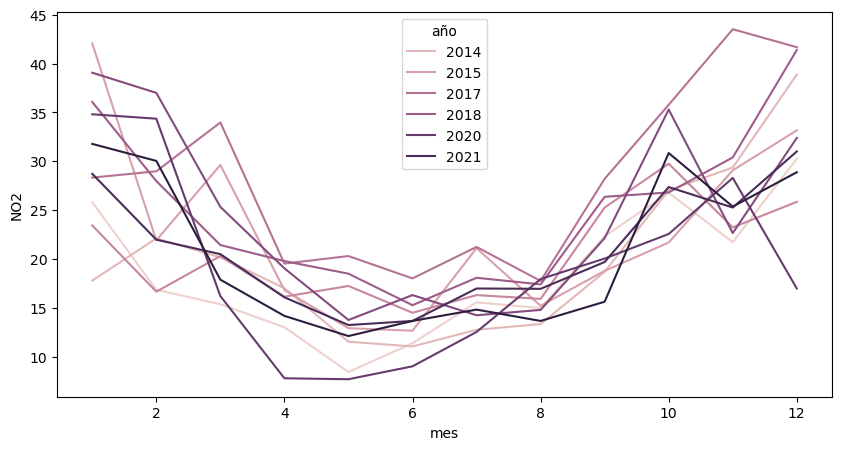

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

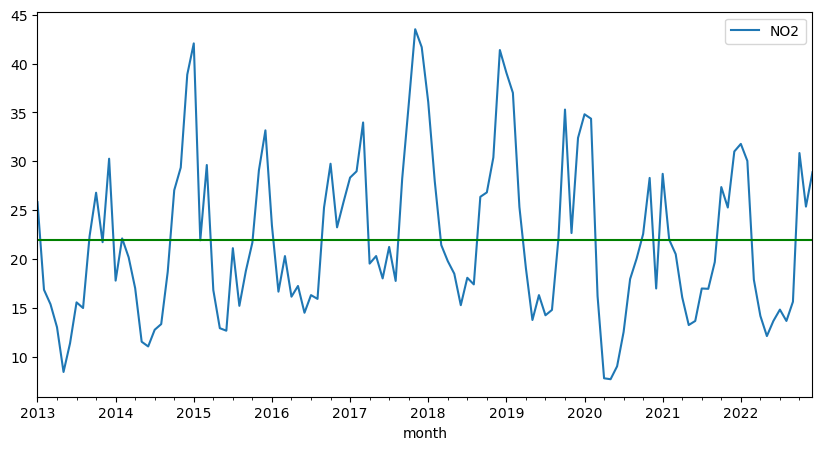

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

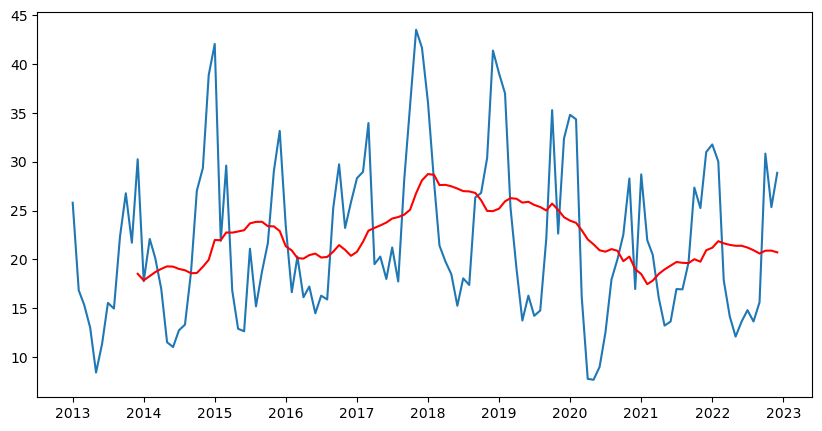

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,25.806452
2013-02-01,16.838710
2013-03-01,15.354839
2013-04-01,13.000000
2013-05-01,8.419355


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,25.806452,2013,1
2013-02-01,16.838710,2013,2
2013-03-01,15.354839,2013,3
2013-04-01,13.000000,2013,4
2013-05-01,8.419355,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,25.806452,2013,1
2013-02-01,16.838710,2013,2
2013-03-01,15.354839,2013,3
2013-04-01,13.000000,2013,4
2013-05-01,8.419355,2013,5


In [15]:
df[df3["month"] == 12]

,NO2
month,
2013-12-01,30.258065
2014-12-01,38.870968
2015-12-01,33.161290
2016-12-01,25.838710
2017-12-01,41.677419
2018-12-01,41.387097
2019-12-01,32.387097
2020-12-01,16.967742
2021-12-01,31.000000


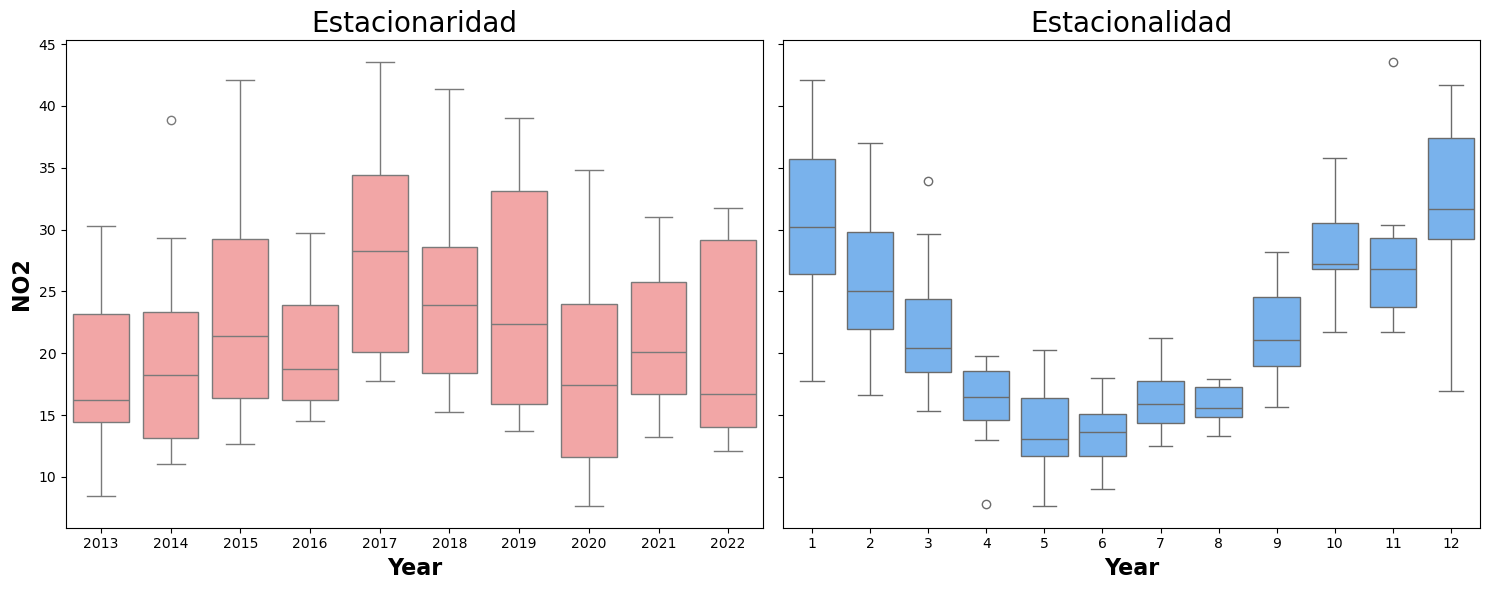

In [16]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [17]:
res = adfuller(df["NO2"])
res

(-1.7459172420268594,
 0.40762317924527147,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 661.0948649187873)

In [18]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -1.7459172420268594
p-value 0.40762317924527147
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [19]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 1.0
1 mes Lag, 0.6951224457355103
2 mes Lag, 0.43409865521837565
3 mes Lag, 0.08486592245338674
4 mes Lag, -0.21124655093199904
5 mes Lag, -0.4517792780601231
6 mes Lag, -0.532483961091918
7 mes Lag, -0.48359216353829226
8 mes Lag, -0.23100112220815192
9 mes Lag, 0.06922956963080167
10 mes Lag, 0.33308448841033444
11 mes Lag, 0.5358832313788399
12 mes Lag, 0.640733815196835
13 mes Lag, 0.579329324321836
14 mes Lag, 0.3396705381682546
15 mes Lag, 0.09207652934425309
16 mes Lag, -0.2589456018681024
17 mes Lag, -0.4826934213234116
18 mes Lag, -0.5802014533022395
19 mes Lag, -0.5318801399556226
20 mes Lag, -0.352346577955031
21 mes Lag, -0.03185794517188553
22 mes Lag, 0.20148610411096382
23 mes Lag, 0.47124095372636154
24 mes Lag, 0.6025750203155764
25 mes Lag, 0.5064990872796217
26 mes Lag, 0.32595598040647455
27 mes Lag, 0.029826489113509002
28 mes Lag, -0.2834784719684456
29 mes Lag, -0.548371758238747
30 mes Lag, -0.6429263625617313
31 mes Lag, -0.5650472542903122
32 mes La

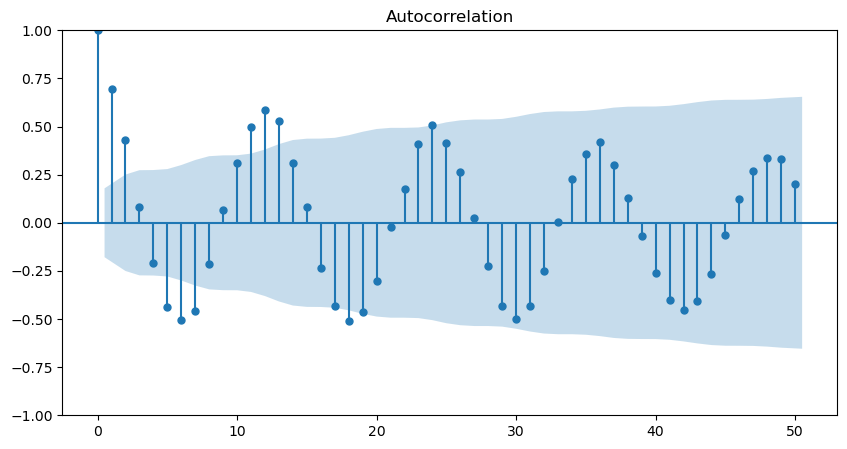

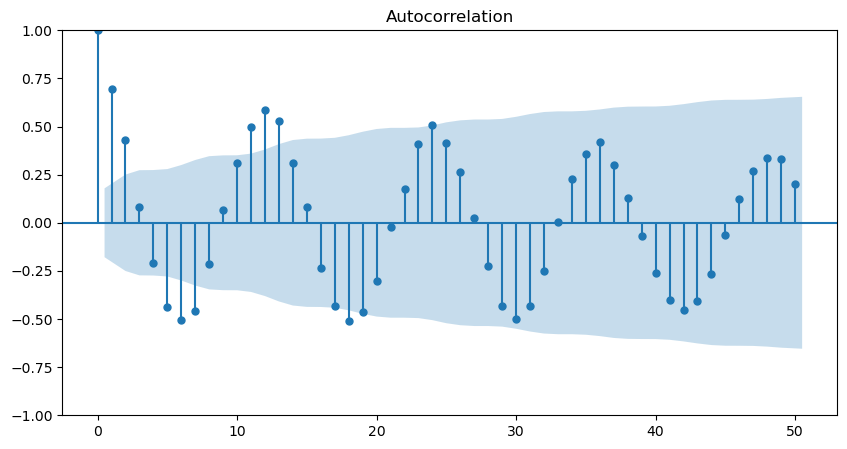

In [20]:
plot_acf(df, lags = 50)

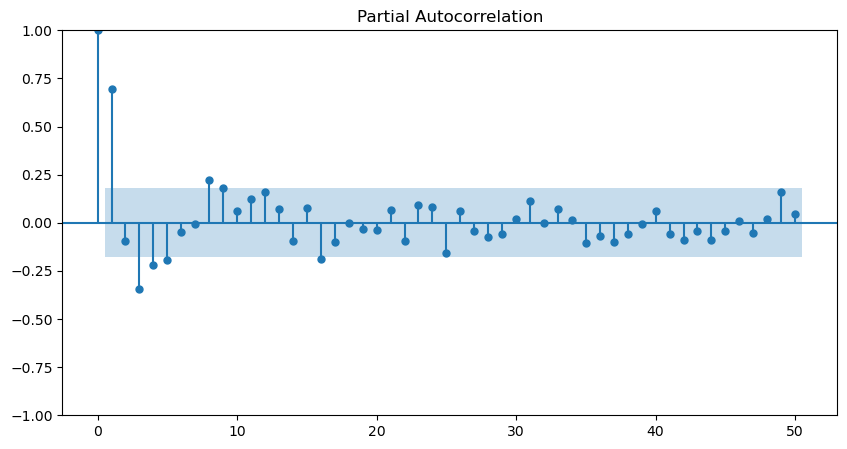

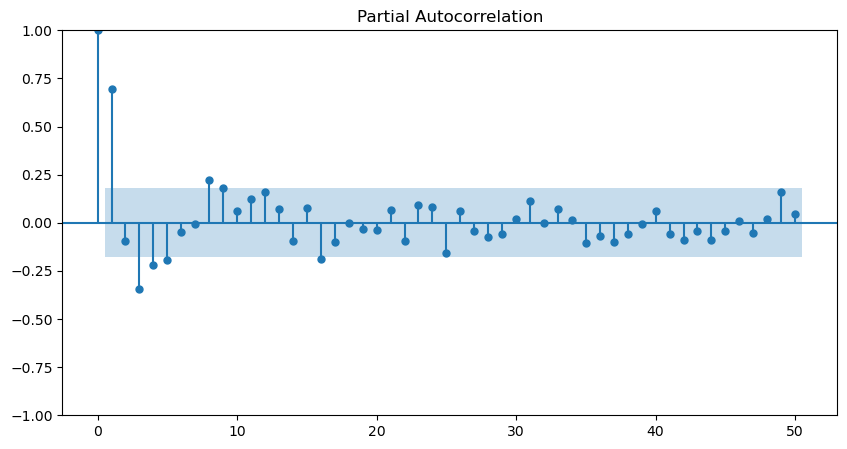

In [21]:
plot_pacf(df, lags = 50)

In [22]:
df.head()

,NO2
month,
2013-01-01,25.806452
2013-02-01,16.838710
2013-03-01,15.354839
2013-04-01,13.000000
2013-05-01,8.419355


In [23]:
df.shape

(120, 1)

In [24]:
df.isnull().sum()

NO2    0
dtype: int64

## SARIMA

In [25]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [26]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [27]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

 62%|██████▎   | 15/24 [00:00<00:00, 28.07it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\

CPU times: total: 781 ms
Wall time: 1.11 s


In [28]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
20,4.377822,"(3, 1, 2)"
8,6.393267,"(1, 1, 2)"
19,6.478069,"(3, 1, 1)"
9,9.021853,"(1, 2, 0)"
18,12.712009,"(3, 1, 0)"


In [29]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(4, 1, 5),  # modelo arima
               seasonal_order=(3, 1, 2, 12) # modelo sarima, estacionalidad es el ultimo
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Error mae:  3.343795809579741
CPU times: total: 875 ms
Wall time: 4.73 s


,real,pred,error
2020-07-01,12.516129,14.490982,1.974853
2020-08-01,17.935484,14.373147,-3.562337
2020-09-01,20.032258,23.303163,3.270905
2020-10-01,22.548387,30.212809,7.664422
2020-11-01,28.290323,31.398081,3.107759
2020-12-01,16.967742,38.332026,21.364284
2021-01-01,28.709677,33.978176,5.268499
2021-02-01,21.967742,30.118438,8.150696
2021-03-01,20.483871,19.147822,-1.336049
2021-04-01,16.064516,15.236758,-0.827759


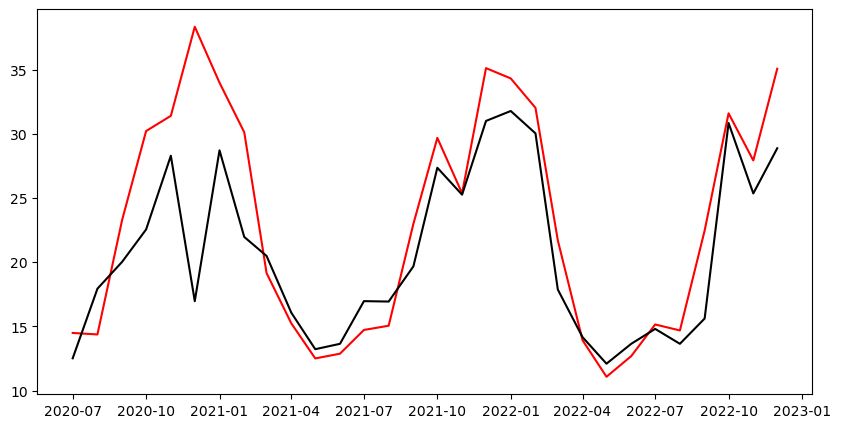

In [30]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [31]:
pred["real_test"] = y_test

In [32]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 12))
pred_año

,predicted_mean
2023-01-01,32.286250
2023-02-01,28.779690
2023-03-01,18.354138
2023-04-01,12.793506
2023-05-01,11.026479
2023-06-01,11.363417
2023-07-01,15.188340
2023-08-01,14.912816
2023-09-01,22.990299
2023-10-01,28.745368


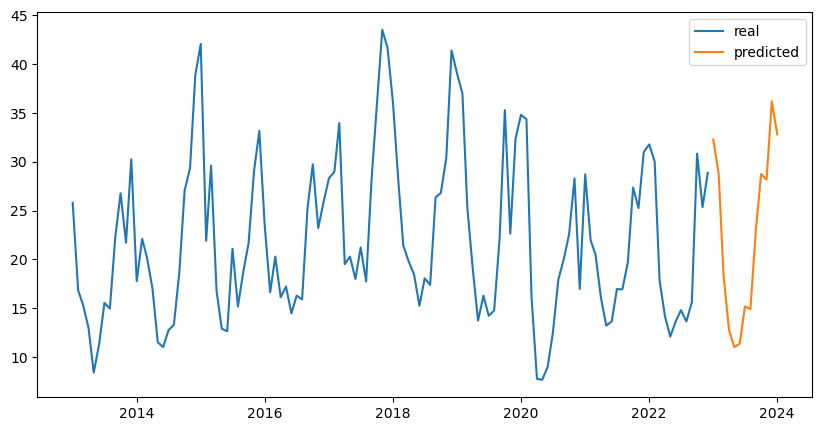

In [33]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [34]:
pred_año.mean()

predicted_mean    22.586179
dtype: float64

In [ ]:
#Corrección primer valor de la predicción

# Obtener el valor de la fila '2023-01-01' y columna 'predicted_mean' en pred_año
valor_pred_año = pred_año.loc['2023-01-01', 'predicted_mean']

# Obtener el valor de la fila '2023-10-01' y columna 'NO2' en df
valor_df = df.loc['2022-12-01', 'NO2']

# Calcular la media entre los dos valores
media = (valor_pred_año + valor_df) / 2

# Sustituir el valor calculado en pred_año
pred_año.loc['2023-11-01', 'predicted_mean'] = media

In [ ]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [ ]:
pred_año.mean()